# 0. Iris flower dataset 

## a) Load dataset & inspect keys

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## b) Convert to DataFrame

In [3]:
import pandas as pd

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")

df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## c) EDA

In [4]:
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

## d) Correlation heatmap

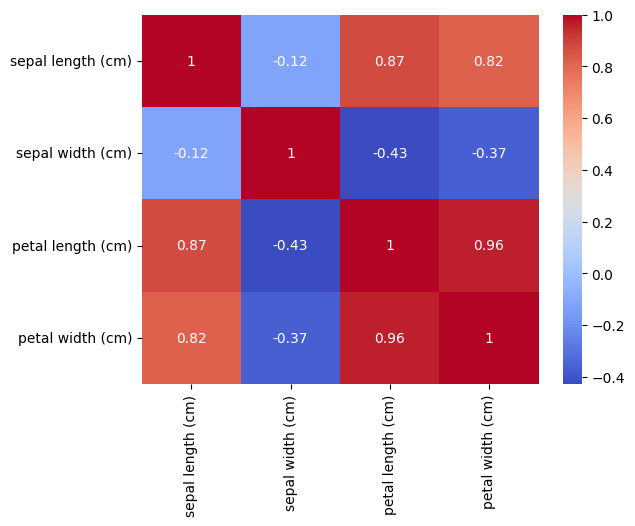

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.drop("target", axis=1).corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

### What the correlation values mean:
Pearson correlation ranges from -1 to +1
- Close to +1  → strong positive relationship
- Close to -1  → strong negative relationship
- Close to  0  → weak or no linear relationship

## e) Boxplot

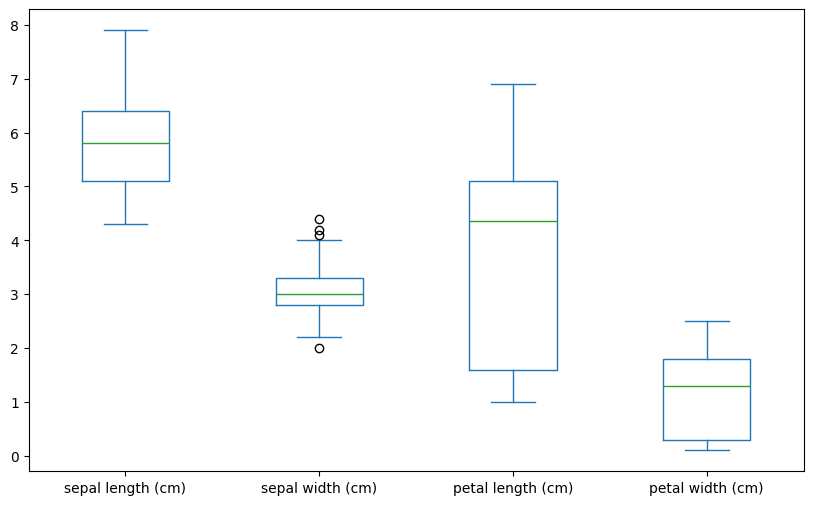

In [6]:
df.drop("target", axis=1).plot(kind="box", figsize=(10, 6))
plt.show()

## f) Remove outliers

In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [9]:
print("Original shape:", df.shape)
print("After removing outliers:", df_clean.shape)

Original shape: (150, 5)
After removing outliers: (146, 5)


## g) Train/Test split + Scaling

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_clean.drop("target", axis=1)
y = df_clean["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5], X_test[:5]


(array([[-1.03285985,  1.3883596 , -1.42644417, -1.41406995],
        [-0.79347575,  1.14172911, -1.36834461, -1.41406995],
        [ 0.28375271, -0.09142337,  0.60704014,  0.77120384],
        [ 0.64282886, -0.58468437,  1.01373701,  1.31752229],
        [-0.9131678 ,  1.14172911, -1.42644417, -1.27749034]]),
 array([[-0.6737837 ,  1.6349901 , -1.36834461, -1.41406995],
        [-0.07532345, -0.83131486,  0.72323925,  0.90778345],
        [-0.79347575,  0.89509861, -1.42644417, -1.41406995],
        [-0.55409165,  0.89509861, -1.25214551, -1.41406995],
        [-1.27224395, -0.09142337, -1.42644417, -1.27749034]]))

## h) Logistic Regression - with verification

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)

preds[:10]


array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0])

## i) First 10 predictions vs labels

In [13]:
pd.DataFrame({"Predicted": preds[:10], "Actual": y_test.iloc[:10].values})


,Predicted,Actual
0,0,0
1,2,2
2,0,0
3,0,0
4,0,0
5,2,2
6,0,0
7,1,1
8,2,1
9,0,0


## j) Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, preds))
confusion_matrix(y_test, preds)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

# 1. KNN for classification and regression

## a) Use KNN to classify the Iris dataset

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

knn_preds = knn_clf.predict(X_test)

### Evaluate KNN classifier

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, knn_preds))
confusion_matrix(y_test, knn_preds)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

## b) Use KNN to predict house prices

In [20]:
import pandas as pd

house_df = pd.read_csv("kc_house_data.csv")

# Preprocessing (same as in Exercise 1)
house_df = house_df.drop(columns=["date"])
house_df = house_df.select_dtypes(include="number")

X_house = house_df.drop("price", axis=1)
y_house = house_df["price"]

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_h = scaler.fit_transform(X_train_h)
X_test_h = scaler.transform(X_test_h)

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_h, y_train_h)

house_preds = knn_reg.predict(X_test_h)

### Evaluate

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test_h, house_preds)
mse = mean_squared_error(y_test_h, house_preds)
rmse = np.sqrt(mse)

mae, mse, rmse

(95187.02567661347, 32792033757.18244, np.float64(181085.708318416))

# 2. Random forest for classification and regression

## a) Random Forest to classify the Iris dataset

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

rf_preds = rf_clf.predict(X_test)

print(classification_report(y_test, rf_preds))
confusion_matrix(y_test, rf_preds)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

## b) Random Forest to predict house prices

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_house, y_house, test_size=0.2, random_state=42
)

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_h, y_train_h)

rf_house_preds = rf_reg.predict(X_test_h)

### Evaluate Random Forest regression

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test_h, rf_house_preds)
mse = mean_squared_error(y_test_h, rf_house_preds)
rmse = np.sqrt(mse)

mae, mse, rmse

(73059.82885393189, 21887160171.483093, np.float64(147943.0977487057))